<a href="https://colab.research.google.com/github/nitishxthakur/DataLab/blob/main/classification_between_with_mask_or_without_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json#': No such file or directory
chmod: cannot access 'configuring': No such file or directory
chmod: cannot access 'the': No such file or directory
chmod: cannot access 'path': No such file or directory
chmod: cannot access 'of': No such file or directory
chmod: cannot access 'Kaggle.json': No such file or directory
chmod: cannot access 'file': No such file or directory


In [1]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 24.5MB/s]
100% 163M/163M [00:08<00:00, 20.2MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data				      istockphoto-1272058180-1024x1024.jpg
face-mask-dataset.zip		      istockphoto-1340743780-1024x1024.jpg
istockphoto-1148017998-1024x1024.jpg  pexels-dana-tentis-118658-671800.jpg
istockphoto-1176772006-1024x1024.jpg  pexels-valon2000-2463012.jpg
istockphoto-1224045010-1024x1024.jpg  sample_data
istockphoto-1252418626-1024x1024.jpg


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2912.jpg', 'with_mask_1711.jpg', 'with_mask_829.jpg', 'with_mask_680.jpg', 'with_mask_33.jpg']
['with_mask_2218.jpg', 'with_mask_666.jpg', 'with_mask_1922.jpg', 'with_mask_1371.jpg', 'with_mask_2640.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1688.jpg', 'without_mask_9.jpg', 'without_mask_2907.jpg', 'without_mask_808.jpg', 'without_mask_529.jpg']
['without_mask_531.jpg', 'without_mask_496.jpg', 'without_mask_272.jpg', 'without_mask_2884.jpg', 'without_mask_476.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
from tensorflow import keras
import numpy as np
import cv2

# Define and train the model
num_of_classes = 2  # Two classes: masked and unmasked

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Resize your training and testing images to 256x256
X_train_resized = np.array([cv2.resize(img, (256, 256)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (256, 256)) for img in X_test])

# Train the model
history = model.fit(X_train_resized, Y_train, validation_split=0.1, epochs=20)

# Save the trained model
model.save('mask_classification_model.h5')
from tensorflow import keras
import numpy as np
import cv2

# Define and train the model
num_of_classes = 2  # Two classes: masked and unmasked

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Resize your training and testing images to 256x256
X_train_resized = np.array([cv2.resize(img, (256, 256)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (256, 256)) for img in X_test])

# Train the model
history = model.fit(X_train_resized, Y_train, validation_split=0.1, epochs=20)

# Save the trained model
model.save('mask_classification_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - acc: 0.6217 - loss: 16.6663 - val_acc: 0.8000 - val_loss: 0.4492
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.8197 - loss: 0.4542 - val_acc: 0.5983 - val_loss: 0.6617
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.7977 - loss: 0.4680 - val_acc: 0.8975 - val_loss: 0.2727
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - acc: 0.8671 - loss: 0.3337 - val_acc: 0.8942 - val_loss: 0.2958
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - acc: 0.8962 - loss: 0.2687 - val_acc: 0.9008 - val_loss: 0.2637
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.8985 - loss: 0.2758 - val_acc: 0.9174 - val_loss: 0.2318
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.9199 - loss: 0.2088 - val_acc: 0.9041 - val_loss: 0.2422
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.9238 - loss: 0.2381 - val_acc: 0.9074 - val_loss: 0.2422
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - acc: 0.5092 - loss: 32.8875 - val_acc: 0.5207 - val_loss: 0.6923
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - acc: 0.5153 - loss: 0.6936 - val_acc: 0.4942 - val_loss: 0.6920
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.5114 - loss: 0.6927 - val_acc: 0.5636 - val_loss: 0.6849
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.5434 - loss: 0.6933 - val_acc: 0.5322 - val_loss: 0.6884
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - acc: 0.5258 - loss: 0.6880 - val_acc: 0.5785 - val_loss: 0.6823
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.5633 - loss: 0.6802 - val_acc: 0.6149 - val_loss: 0.6614
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.5990 - loss: 0.6670 - val_acc: 0.5736 - val_loss: 0.6775
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - acc: 0.6246 - loss: 0.6413 - val_acc: 0.6050 - val_loss: 0.6594
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━

Path of the image to be predicted: /content/pexels-valon2000-2463012.jpg


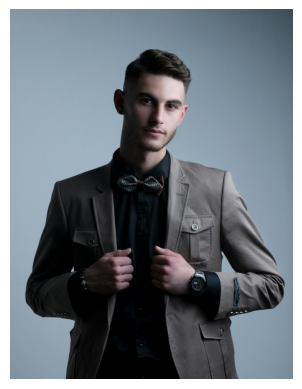

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [ ]:
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import Counter

# Load the pre-trained model
model = keras.models.load_model('mask_classification_model.h5')

# Load and display the large input image
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.axis('off')
plt.show()

# Parameters for sliding window
patch_size = 256
step_size = 128
patch_predictions = []

# Apply sliding window approach for predictions on each patch
for y in range(0, input_image.shape[0] - patch_size + 1, step_size):
    for x in range(0, input_image.shape[1] - patch_size + 1, step_size):
        patch = input_image[y:y+patch_size, x:x+patch_size]
        patch_resized = patch / 255.0
        patch_reshaped = np.reshape(patch_resized, (1, patch_size, patch_size, 3))

        # Predict the patch
        patch_prediction = model.predict(patch_reshaped)
        patch_pred_label = np.argmax(patch_prediction, axis=1)[0]
        patch_predictions.append(patch_pred_label)

# Majority voting for final prediction
majority_label = Counter(patch_predictions).most_common(1)[0][0]
if majority_label == 1:
    print('The person in the image is wearing a mask.')
else:
    print('The person in the image is not wearing a mask.')
